**Introduction**

The Fourier transform is a mathematical formula that relates a signal sampled in time or space to the same signal sampled in frequency. In signal processing, the Fourier transform can reveal important characteristics of a signal, namely, its frequency components.

The Fourier transform is a mathematical technique that allows an MR signal to be decomposed into a sum of sine waves of different frequencies, phases, and amplitudes. This remarkable result derives from the work of Jean-Baptiste Joseph Fourier (1768-1830), a French mathematician and physicist.  Since spatial encoding in MR imaging involves frequencies and phases, it is naturally amenable to analysis by Fourier techniques. 
Fourier showed that any periodic signal s(t) can be written as a sum of sine waves with various amplitudies, frequencies and phases.



 The length of the file is: 6930000 as expected from 15000 samples x 462 lines

 The length of the time array is: 15000


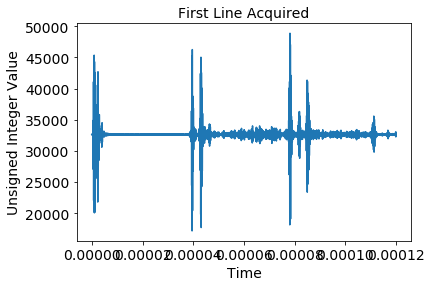

In [1]:
%matplotlib inline

#now we import different packages that will allow to do math, lineal algebra, numerical operations, array operations and plotting
import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})

#we use a simple open command for the file (basic Python)
f = open('UltrasoundSampleSignal.dat','rb')   # Windows
#we read it using a numpy (therefore the np.) command that allows direct reading from file into an array
AllSignal = np.fromfile(f,count=-1,dtype=np.uint16)
#to verify the size of the file I am printing here the lenght of that array 
print('\n The length of the file is: ' + str(len(AllSignal)) + ' as expected from 15000 samples x 462 lines')
#we will now populate an array for the time which we now is 1/125MHz step for a total of 15000
x=np.arange(0,15000/125e6,1/125e6)  #start,stop,step
print('\n The length of the time array is: ' + str(len(x)) )
#now we plot only the first line acquired (15000 samples)
plt.plot(x,AllSignal[:15000])
plt.title('First Line Acquired',fontsize=14)
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value',fontsize=14)

f.close()

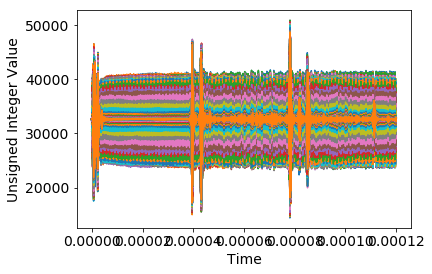

In [2]:
totlines=np.arange(462)
for index in totlines:
    plt.plot(x,AllSignal[index*15000:(index+1)*15000])
    plt.xlabel('Time')
    plt.ylabel('Unsigned Integer Value')

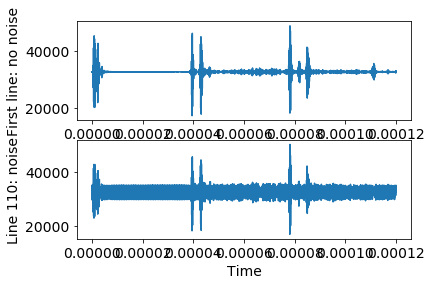

In [3]:
FirstLine=AllSignal[:15000]
#Line 110 has noise
NoisyLine=AllSignal[110*15000:111*15000]

plt.subplot(211)
plt.ylabel('First line: no noise')
plt.plot(x,FirstLine)
plt.subplot(212)
plt.plot(x,NoisyLine)
plt.ylabel('Line 110: noise')
plt.xlabel('Time')

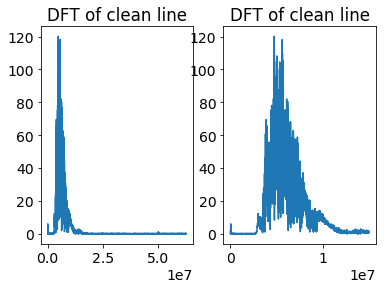

In [4]:
#we first eliminate dc
data=FirstLine-np.mean(FirstLine)
L=len(data)
#the frequencies after fft will be between 0 and 1/2 of the sampling frequency
f=np.arange(0,125e6/2,125e6/15000)
Y=np.fft.fft(data)
Pyy=abs(Y)/L
#note: we are showing just L/2 elements which are the positive frequencies and we are normalizing
plt.subplot(121)
plt.plot(f, Pyy[:7500])
plt.title('DFT of clean line')
#Zooming into just less than 15MHz
inx=np.where(f>15e6)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], Pyy[:inx[0]])
plt.title('DFT of clean line')

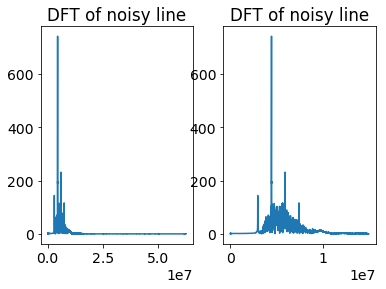

In [5]:
data=NoisyLine-np.mean(NoisyLine)
L=len(data)
#the frequencies after fft will be between 0 and 1/2 of the sampling frequency
f=np.arange(0,125e6/2,125e6/15000)
Y=np.fft.fft(data)
Pyy=abs(Y)/L
#note: we are showing just L/2 elements which are the positive frequencies and we are normalizing
plt.subplot(121)
plt.plot(f, Pyy[:7500])
plt.title('DFT of noisy line')
#Zooming into just less than 15MHz
inx=np.where(f>15e6)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], Pyy[:inx[0]])
plt.title('DFT of noisy line')

15000


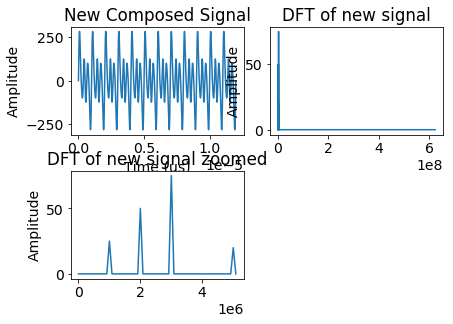

In [6]:
t=np.arange(0,12e-6,0.0008e-6) #time vector
AllSignalN = 50*np.sin(2*np.pi*1e6*t)+100*np.sin(2*np.pi*2e6*t)+150*np.sin(2*np.pi*3e6*t)+40*np.sin(2*np.pi*5e6*t) #new composed signal
#Plotting the new signal
plt.subplot(221)
plt.tight_layout()
plt.plot(t,AllSignalN)
plt.title('New Composed Signal')
plt.xlabel('Time (us)')
plt.ylabel('Amplitude')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
L=len(AllSignalN)
f=np.arange(0,1.25e9/2,1.25e9/15000)
Y=np.fft.fft(AllSignalN)
Pyy=abs(Y)/L
print(len(Pyy))
plt.subplot(222)
plt.plot(f, Pyy[:7500])
plt.title('DFT of new signal')
plt.ylabel('Amplitude')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#Zooming into just less than 15MHz
inx=np.where(f>5.1e6)
inx=inx[0]
plt.subplot(223)
plt.plot(f[:inx[0]], Pyy[:inx[0]])
plt.title('DFT of new signal zoomed')
plt.ylabel('Amplitude')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

15000


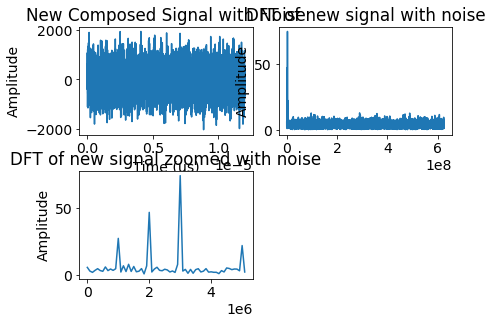

In [7]:
ns = 500*np.random.normal(0,1,15000)
AllSignalNs=AllSignalN+ns
#Plotting the new signal
plt.subplot(221)
plt.tight_layout()
plt.plot(t,AllSignalNs)
plt.title('New Composed Signal with Noise')
plt.xlabel('Time (us)')
plt.ylabel('Amplitude')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
L=len(AllSignalNs)
f=np.arange(0,1.25e9/2,1.25e9/15000)
Y=np.fft.fft(AllSignalNs)
Pyy=abs(Y)/L
print(len(Pyy))
plt.subplot(222)
plt.plot(f, Pyy[:7500])
plt.title('DFT of new signal with noise')
plt.ylabel('Amplitude')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#Zooming into just less than 15MHz
inx=np.where(f>5.1e6)
inx=inx[0]
plt.subplot(223)
plt.plot(f[:inx[0]], Pyy[:inx[0]])
plt.title('DFT of new signal zoomed with noise')
plt.ylabel('Amplitude')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

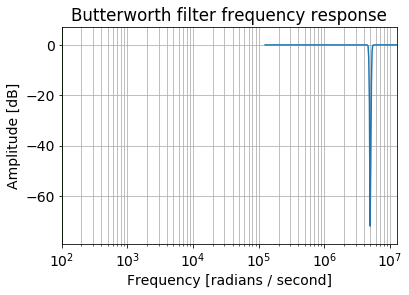

In [8]:
from scipy import signal

#Getting it ready to filter 2MHz
fs=1.25e9;
fc1=4.7e6;
fc2=5.3e6;

b, a = signal.butter(4, [fc1/fs,fc2/fs], 'bandstop', analog=True)
w, h = signal.freqs(b, a)
wf=w*fs;
plt.plot(wf, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

15000


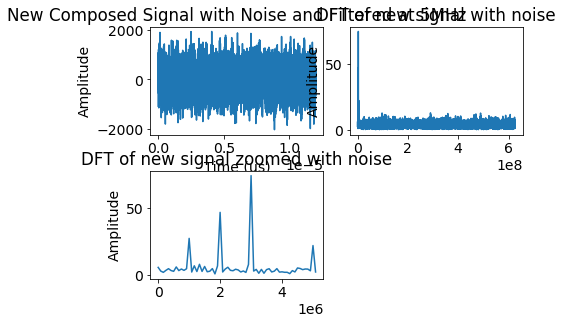

In [9]:
FiltSignal=signal.lfilter(b,a,AllSignalNs)
#Plotting the new signal
plt.subplot(221)
plt.tight_layout()
plt.plot(t,FiltSignal)
plt.title('New Composed Signal with Noise and Filtered at 5MHz')
plt.xlabel('Time (us)')
plt.ylabel('Amplitude')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
L=len(FiltSignal)
f=np.arange(0,1.25e9/2,1.25e9/15000)
Y=np.fft.fft(FiltSignal)
Pyy=abs(Y)/L
print(len(Pyy))
plt.subplot(222)
plt.plot(f, Pyy[:7500])
plt.title('DFT of new signal with noise')
plt.ylabel('Amplitude')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#Zooming into just less than 15MHz
inx=np.where(f>5.1e6)
inx=inx[0]
plt.subplot(223)
plt.plot(f[:inx[0]], Pyy[:inx[0]])
plt.title('DFT of new signal zoomed with noise')
plt.ylabel('Amplitude')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

**References**

. "Fourier Transform" jupyter notebook by Laura Curiel.